# Logistic regression

## To predict whether a person will have diabetes or not.

In [11]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
## Load the data
data=pd.read_csv('diabetes.csv')

In [10]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Basic Checks 

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Domain Analysis.

### Exploratory Data Analysis

In [8]:
#Step 1 Univariate Analysis
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='count'>

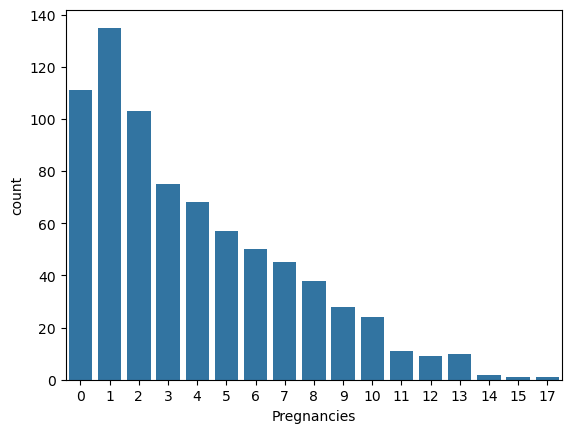

In [9]:
sns.countplot(x='Pregnancies',data=data)
# Maximum patients have conceived  1 and 0 times.

In [10]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [11]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


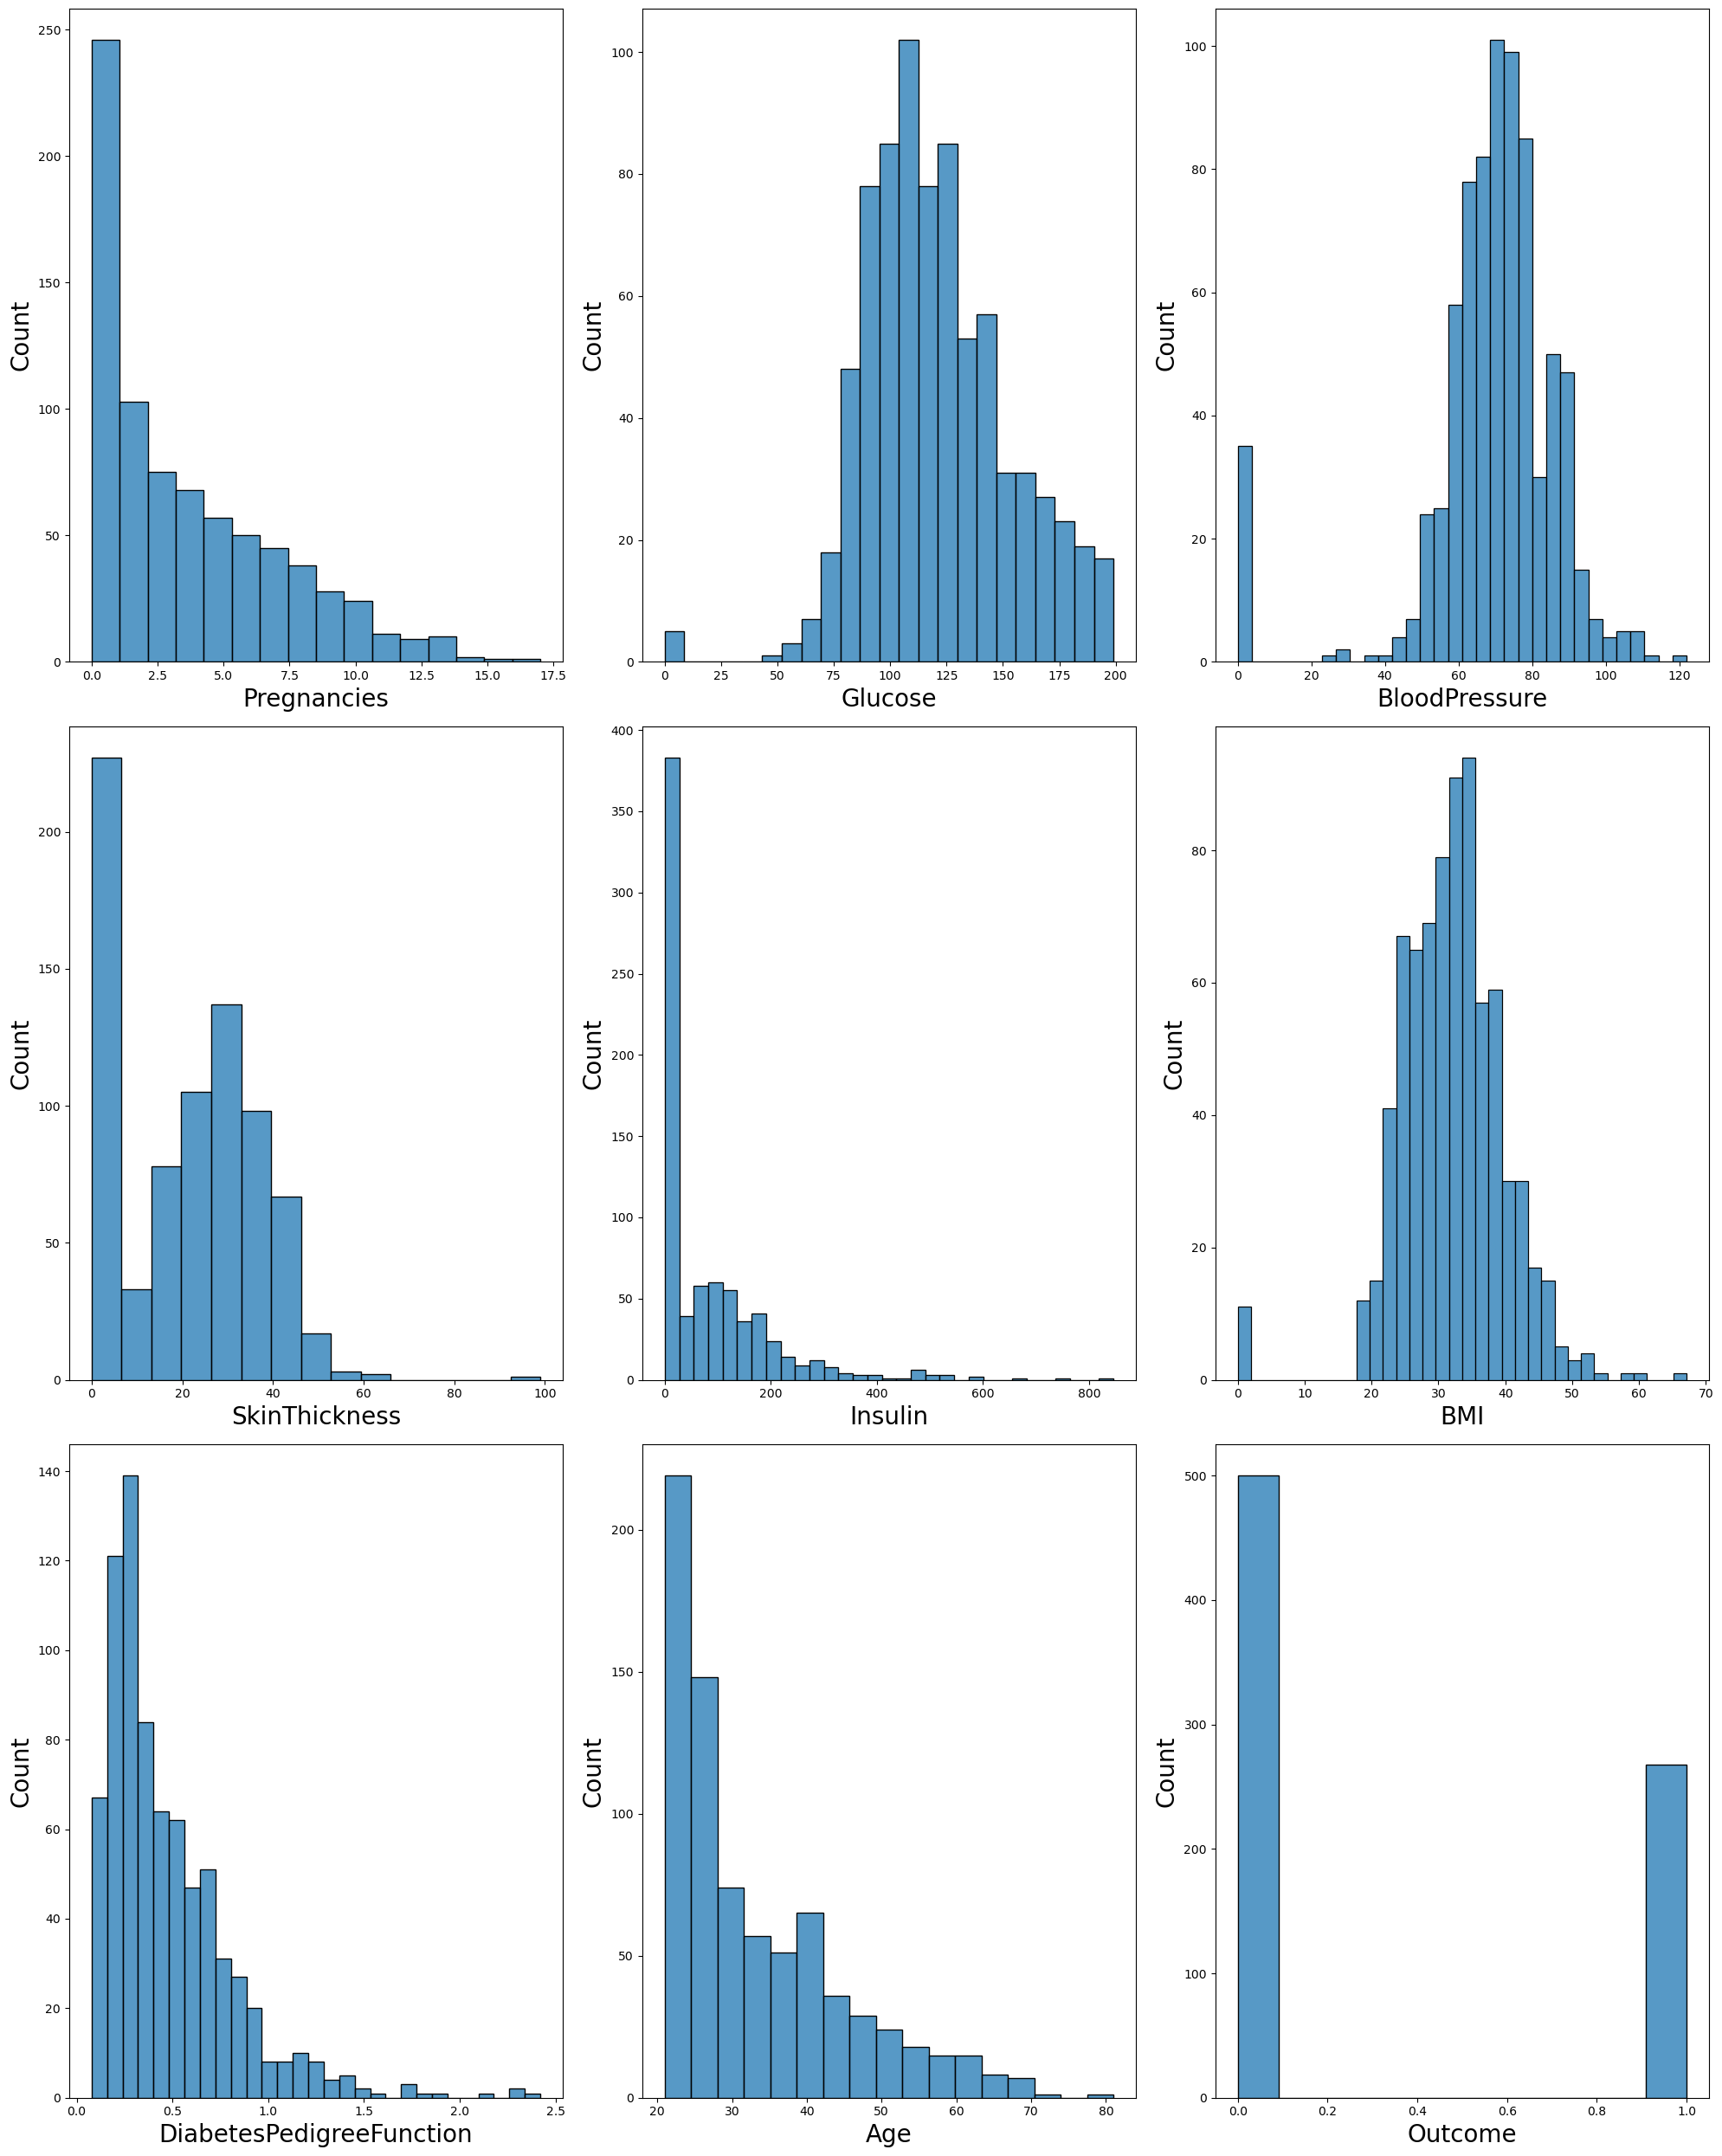

In [14]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [13]:
for column in data:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


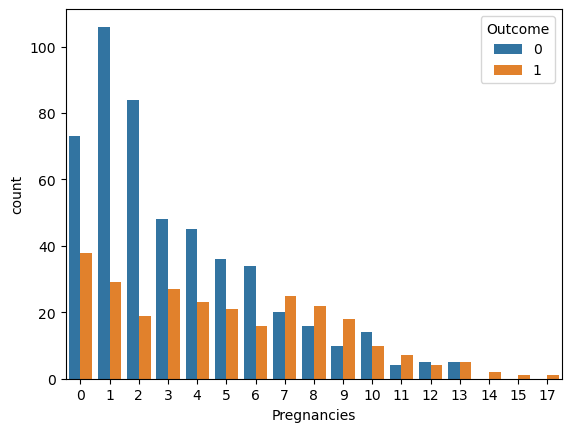

In [15]:
##Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how preganancies impact the patient with diabetes.
sns.countplot(x='Pregnancies',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='Glucose', ylabel='Count'>

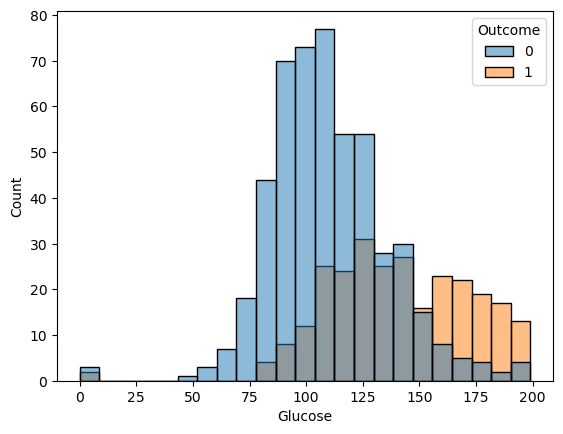

In [16]:
## Aanlyzing the relationship between diabetes and Glucose
sns.histplot(x='Glucose',hue='Outcome',data=data)

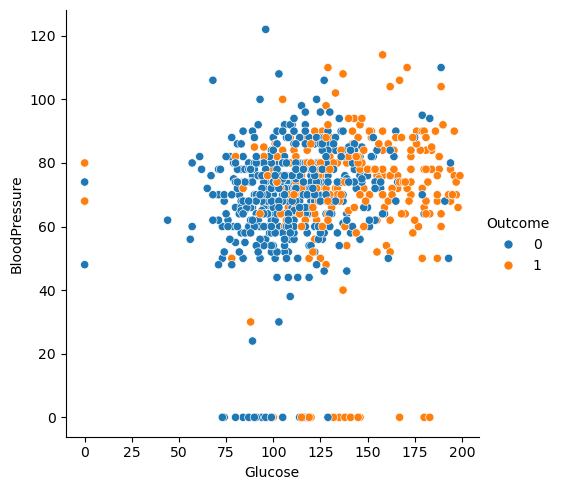

In [17]:
## Analyze Glucose with blood pressure

sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

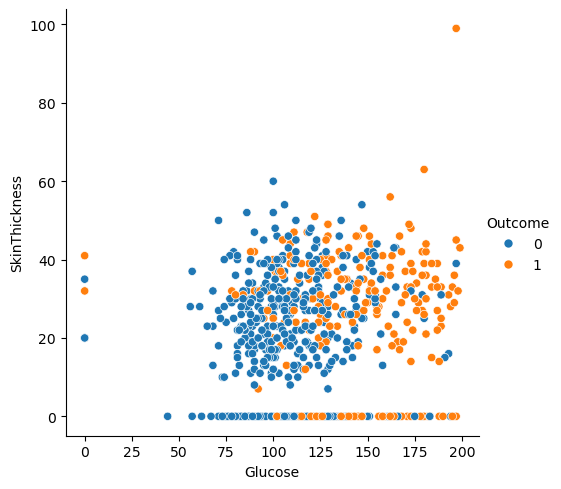

In [18]:
## Analyze Glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

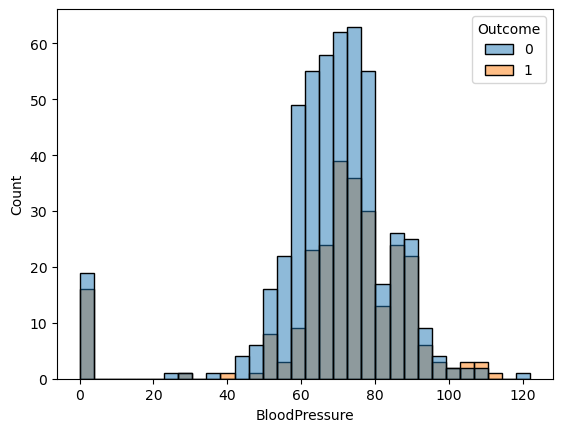

In [19]:
## Analyze relationship between BloodPressure and Outcome

sns.histplot(x='BloodPressure',hue='Outcome',data=data)

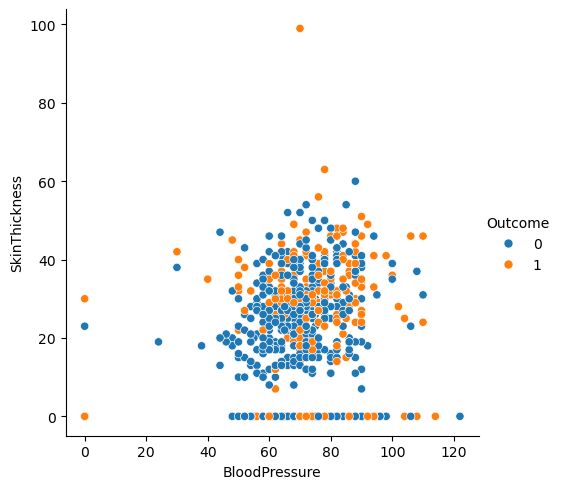

In [20]:
## Analyze BP with SkinThickness

sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

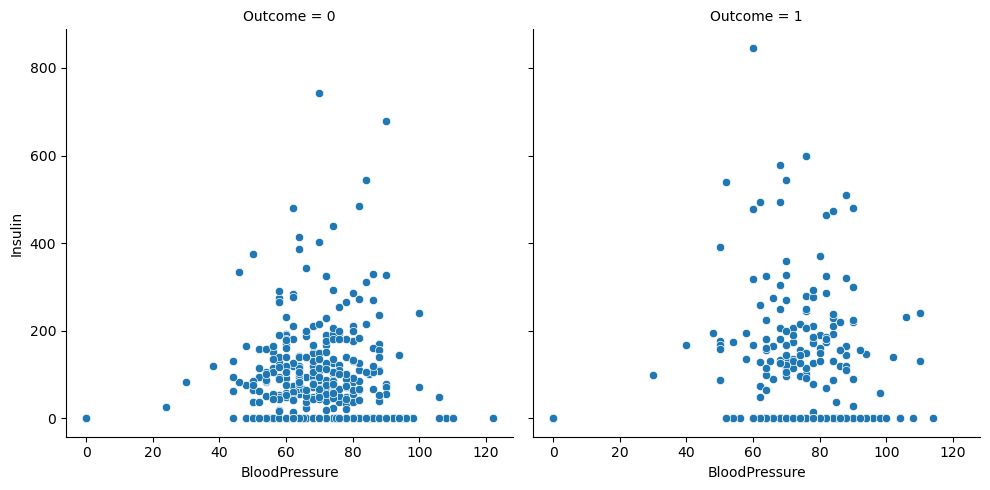

In [21]:
## Analyze BP with Insulin

sns.relplot(x='BloodPressure',y='Insulin',col='Outcome',data=data)
plt.show()

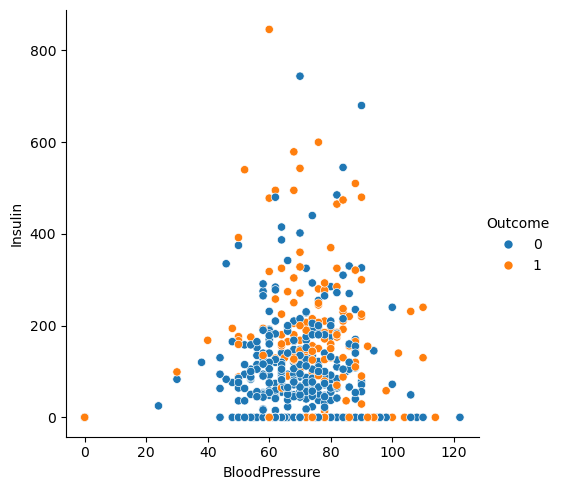

In [22]:
sns.relplot(x='BloodPressure',y='Insulin',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='Insulin', ylabel='Count'>

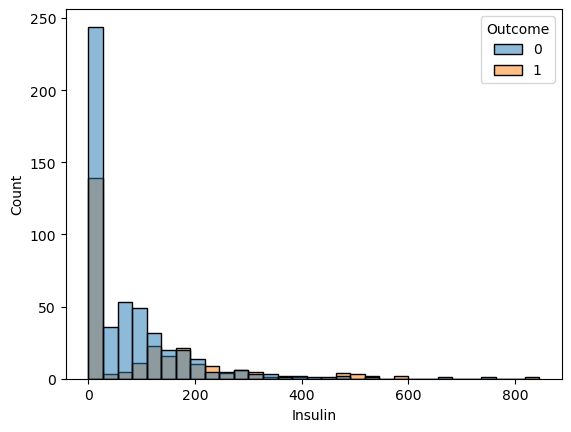

In [23]:
## Analyzing Insulin with target
sns.histplot(x='Insulin',hue='Outcome',data=data)

## Data Preprocessing and Feature Engineering.

In [ ]:
#Step 1 Handling the missing values
data.isnull().sum()

In [ ]:
## Step 2 Handling the corrupted data.
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)

#dataframe.column.replace('Value to be replaced','By what value')

In [ ]:
data.loc[data['BloodPressure']==0]

In [ ]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [ ]:
## Step 3:-Numerical representation of string data

In [ ]:
## Step 4:-Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
data.describe()

In [ ]:
## Step 5:-Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(dl,axis=1))

In [ ]:
data1

In [ ]:
data.columns

In [ ]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
data2.describe()

In [ ]:
con_data=data[['Pregnancies','Outcome']]

In [ ]:
con_data

In [ ]:
data2

In [ ]:
final_df=pd.concat([data2,con_data],axis=1)

In [ ]:
final_df

In [ ]:
final_df.describe()

## Feature  Selection

In [ ]:
## No redundant fetaures
## We will check correlation
sns.heatmap(data2.corr(),annot=True)

# So no correlation hence no features should be 

## Model Creation

In [ ]:
final_df

In [ ]:
## Step 1 Creating independent and dependent variable.

X=final_df.iloc[:,:-1]
y=final_df.Outcome

In [ ]:
y

In [ ]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20

In [ ]:
y_train

In [ ]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

In [ ]:
## Step 4 Prediction
y_pred=clf.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
y_pred_prob=clf.predict_proba(X_test)

In [ ]:
y_pred_prob

In [ ]:
data.Outcome.value_counts()

## Evaluation of Model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
recall=recall_score(y_test,y_pred)
recall

In [ ]:
precision=precision_score(y_test,y_pred)
precision

In [ ]:
f1score=f1_score(y_test,y_pred)
f1score

In [ ]:
ascore=accuracy_score(y_test,y_pred)
ascore

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

In [ ]:
y_test.value_counts()

# Multiclass Classification

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [ ]:
df

In [ ]:
# Model Creation

X=df.iloc[:,:-1]
y=df.Name

In [ ]:
X

In [ ]:
## Training and testing data
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,random_state=25)

In [ ]:
len(X_train1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_multi=LogisticRegression()
lr_multi.fit(X_train1,y_train1)

In [ ]:
y_pred=lr_multi.predict(X_test1)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test1,y_pred)
print(cm)

In [ ]:
y_pred

In [ ]:
y_test1

In [ ]:
recall=recall_score(y_test1,y_pred,average='weighted')
recall

In [ ]:
precision=precision_score(y_test1,y_pred,average='weighted')
precision

In [ ]:
f1score=f1_score(y_test1,y_pred,average='weighted')
f1score

In [ ]:
cr=classification_report(y_test1,y_pred)
print(cr)